In [2]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
import scipy
from numpy.linalg import slogdet
import matplotlib.pyplot as plt
bempp.api.show_available_platforms_and_devices()
bempp.api.set_default_device(0, 0)

0: Portable Computing Language
    0: pthread-Intel(R) Xeon(R) W-2155 CPU @ 3.30GHz


Setting the size of the element of the mesh and the center of the two spheres. The radius of the sphere is 1 and the length of the cube is 1 by default.

In [3]:
h = 0.2   # size of the mesh (element)
center1 = (2, 0, 0) # center of one sphere
center2 = (-2, 0, 0) # center of the other sphere

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1) # construct the spheres
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

Construct RWG and SNC in difference spaces.

In [4]:
rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

In [6]:
N = 10
lbound = 0.05
ubound = 4

In [7]:
wavenumber = 1j* 0.05

op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

mat11 = op11.weak_form().A
mat12 = op12.weak_form().A
mat21 = op21.weak_form().A
mat22 = op22.weak_form().A

mat = np.linalg.inv(mat11) @ mat12 @ np.linalg.inv(mat22) @ mat21

In [11]:
Eigs,evals = np.linalg.eig(mat)

In [13]:
Eigs1,evals1 = np.linalg.eig(mat12@mat21)

In [15]:
Eigs2,evals2 = np.linalg.eig(mat11@mat22)

In [22]:
np.real(Eigs)

array([ 1.25370829e-03,  3.84706834e-04,  3.84821093e-04, ...,
       -1.25242845e-20, -1.25242845e-20,  1.31189166e-20])

In [24]:
np.real(Eigs1)

array([ 1.24457284e-04,  3.75749208e-05,  3.69707031e-05, ...,
       -1.38565290e-23, -1.69101931e-23, -1.38565290e-23])

In [23]:
np.real(Eigs2)

array([1.01199750e+01, 1.00148227e+01, 9.92297543e+00, ...,
       6.18685523e-10, 6.02721594e-10, 5.99548839e-10])

In [71]:
%matplotlib inline
from matplotlib.pyplot import figure

The left plot shows the relative log determinant with increasing imaginary wavenumber. The right plot uses a scale appropriate for the trapezoid quadrature rule.

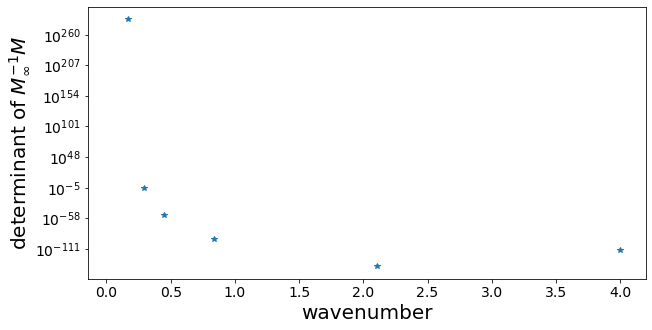

In [104]:
%matplotlib inline
from matplotlib.pyplot import figure
plt.figure(figsize=(10,5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('wavenumber', fontsize = 20)
plt.ylabel('determinant of $M_{\infty}^{-1}M$', fontsize = 20)
plt.semilogy(-np.log(quad_points),determinant_list, '*')

In [74]:
-np.log(quad_points)

array([4.        , 2.10395782, 1.48885962, 1.11082587, 0.83714692,
       0.62250034, 0.4458838 , 0.29582816, 0.16537909, 0.05      ])

In [78]:
determinant_list

[4.3687710816538344e-113,
 2.228871481131103e-142,
 -1.4586943100488628e-149,
 -4.117853124037817e-118,
 2.568363841124581e-94,
 -7.558091351502552e-92,
 3.427049567016164e-53,
 7.380409967732699e-06,
 5.330748683251814e+286,
 -5.0139335631167644e+287]

In [97]:
a,b = slogdet([[-1,0],[0,1]])

In [98]:
a

-1.0

In [99]:
b

0.0

In [7]:
np.linspace(0.00325,0.0055, 5)

array([0.00325  , 0.0038125, 0.004375 , 0.0049375, 0.0055   ])